# Exploring Data


By understanding the business and the data, you are able to create better models and have a better
impact on their business. Before creating a model, I will do some exploratory data analysis. This gives me a feel for the data, but also is a great excuse to meet and discuss issues with business units that control that data.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.features import JointPlotVisualizer, Rank2D
import seaborn as sns

In [2]:
# URL to the dataset
url = r"data/titanic.csv"

# Read the dataset
titanic_df = pd.read_csv(url)


# Check the Data Size
titanic_df.shape

(1309, 14)

> The dataset has 1309 rows and 13 columns

In [3]:
# Get summary statistics

titanic_df.describe().iloc[:,[0,1]]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


> The count row tells us that both of these columns are filled in. There are no
missing values. We also have the mean, standard deviation, minimum,
maximum, and quartile values.

## Histogram

A histogram is used to visualize numeric data.

<AxesSubplot:ylabel='Frequency'>

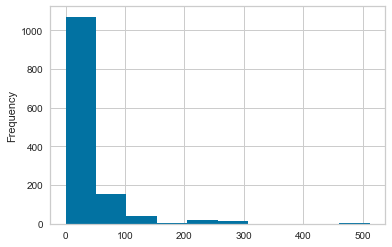

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

titanic_df['fare'].plot(kind='hist', ax=ax)

## Scatterplot

A scatter plot shows the relationship between two numeric columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='fare'>

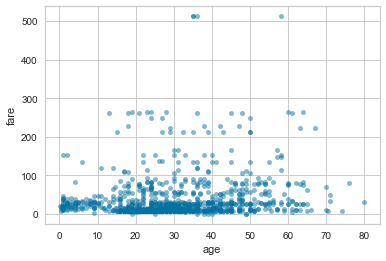

In [5]:
titanic_df.plot.scatter(x='age', y='fare', alpha=0.5)

> There doesn’t appear to be much correlation between these two features.
We can do Pearson correlation between two (pandas) columns with the
.corr method to quantify the correlation:

In [6]:
titanic_df['age'].corr(titanic_df['fare'])

0.17873932314646118

## Box and Violin Plots



<AxesSubplot:xlabel='survived', ylabel='age'>

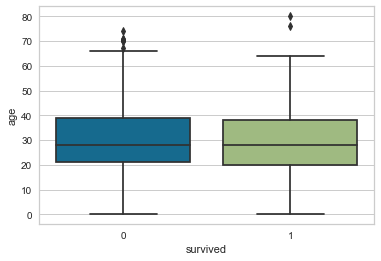

In [7]:
fig, ax = plt.subplots(figsize=(6,4))


sns.boxplot(x=titanic_df['survived'],  y=titanic_df['age'])

<AxesSubplot:xlabel='survived', ylabel='age'>

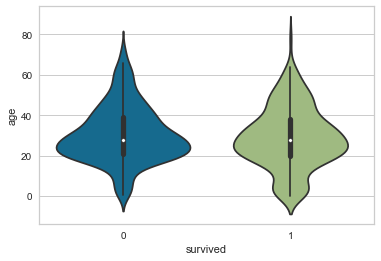

In [8]:
sns.violinplot(x=titanic_df['survived'],  y=titanic_df['age'])

## Correlation



In [16]:
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


> Highly correlated columns don’t add value and can throw off feature
importance and interpretation of regression coefficients. Below is code to
find the correlated columns. In our data none of the columns are highly
correlated (remember we removed the sex_male column).

In [28]:
def correlated_columns(df, threshold=0.5):
    return(
        df.corr()
        .pipe(
            lambda df_1: pd.DataFrame(
                np.tril(df_1, k=-1),
                columns=df.columns,
                index=df.columns
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[s.abs() > threshold].reset_index()
             )
        .query("level_0 not in level_1")
    )

X = titanic_df[['pclass', 'survived', 'age', 'sibsp', 'parch',	'fare', 'body']]

correlated_columns(X)

,level_0,level_1,pearson
0,fare,pclass,-0.558629
